In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Stock = pd.read_csv('/content/drive/MyDrive/AAPL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [ ]:
df_Stock.tail(5)


,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,444.45,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,450.91,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,437.50,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


In [ ]:
df_Stock.shape


(3732, 63)

In [ ]:
df_Stock.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

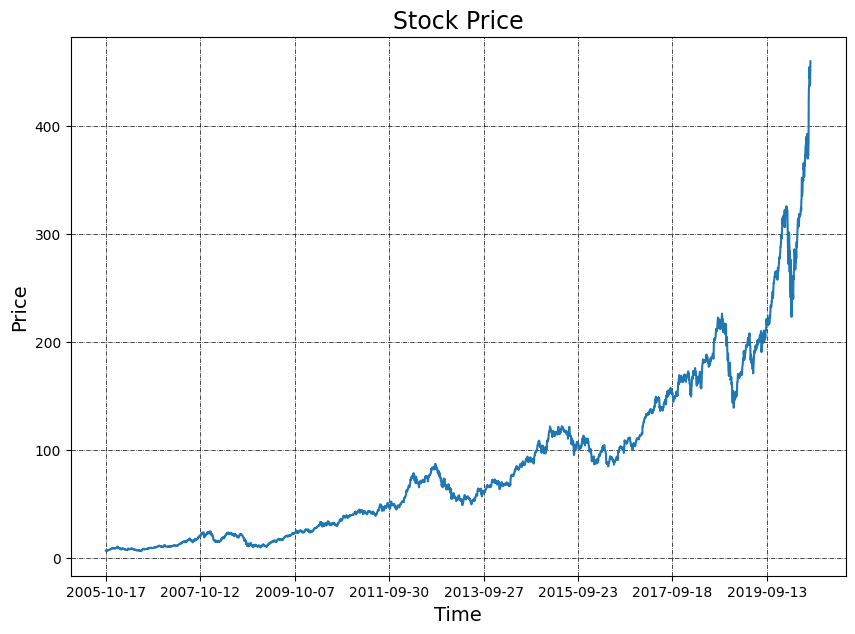

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
df_Stock = df_Stock.drop(columns='Date_col')


Epoch 1/60
206/206 [==============================] - 4s 5ms/step - loss: 6069.3159 - val_loss: 672.9332
Epoch 2/60
206/206 [==============================] - 1s 4ms/step - loss: 290.4221 - val_loss: 108.9891
Epoch 3/60
206/206 [==============================] - 1s 3ms/step - loss: 100.0506 - val_loss: 56.2880
Epoch 4/60
206/206 [==============================] - 1s 5ms/step - loss: 56.1214 - val_loss: 37.9483
Epoch 5/60
206/206 [==============================] - 0s 2ms/step - loss: 38.8764 - val_loss: 25.7387
Epoch 6/60
206/206 [==============================] - 0s 2ms/step - loss: 29.1447 - val_loss: 19.0992
Epoch 7/60
206/206 [==============================] - 0s 2ms/step - loss: 23.9501 - val_loss: 14.1288
Epoch 8/60
206/206 [==============================] - 0s 2ms/step - loss: 21.0354 - val_loss: 14.2093
Epoch 9/60
206/206 [==============================] - 0s 2ms/step - loss: 17.9824 - val_loss: 14.4145
Epoch 10/60
206/206 [==============================] - 0s 2ms/step - loss: 1

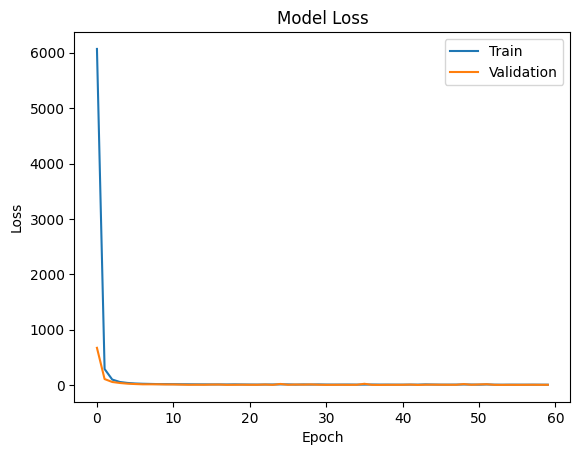

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_Stock is already prepared and correctly formatted

# Function to create train, validation, and test sets
def create_train_test_set(df_Stock):
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']

    # Normalizing features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Splitting the dataset
    X_train, X_temp, Y_train, Y_temp = train_test_split(features_scaled, target, test_size=0.12, random_state=42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test, scaler

X_train, X_val, X_test, Y_train, Y_val, Y_test, scaler = create_train_test_set(df_Stock)

# Define MLP model architecture
def create_mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the MLP model
model = create_mlp_model(X_train.shape[1])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=60, batch_size=16, verbose=1)

# Evaluate the model
def evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    Y_test_pred = model.predict(X_test)


    print("Training MSE:", mean_squared_error(Y_train, Y_train_pred))
    print("Validation MSE:", mean_squared_error(Y_val, Y_val_pred))
    print("Test MSE:", mean_squared_error(Y_test, Y_test_pred))

    print("Training R-squared:", r2_score(Y_train, Y_train_pred))
    print("Validation R-squared:", r2_score(Y_val, Y_val_pred))
    print("Test R-squared:", r2_score(Y_test, Y_test_pred))

evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have the scaler and model already trained
# scaler = ...  # Your trained StandardScaler
# model = ...   # Your trained MLP model

# Feature names used during training
feature_names_used_during_training = [
    'Open', 'High', 'Low','Close', 'Volume', 'SD20', 'Upper_Band', 'Lower_Band',
    'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)',
    'MA5', 'MA10', 'MA20', 'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200',
    'MACD', 'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
    'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week',
    'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
    'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month',
    'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50',
    'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)'
]

# Provided values for features
custom_input_values = {
    'Open': 7.02,
    'High': 7.03,
    'Low': 6.83,
    'Close':6.87,
    'Volume': 199181500,
    'SD20': 0.216680094,
    'Upper_Band': 6.974860188,
    'Lower_Band': 6.108139812,
    'S_Close(t-1)': 6.93,
    'S_Close(t-2)': 6.78,
    'S_Close(t-3)': 6.45,
    'S_Close(t-5)': 6.67,
    'S_Open(t-1)': 6.72,
    'MA5': 6.726,
    'MA10': 6.56,
    'MA20': 6.5415,
    'MA50': 6.209,
    'MA200': 5.20315,
    'EMA10': 6.760108607,
    'EMA20': 6.760108607,
    'EMA50': 6.760108607,
    'EMA100': 6.760108607,
    'EMA200': 6.760108607,
    'MACD': 0.153339954,
    'MACD_EMA': 0.129844817,
    'ATR': 0.24109363,
    'ADX': 22.06352634,
    'CCI': 1333.333333,
    'ROC': 8.530805687,
    'RSI': 60.683333,
    'William%R': -14.28571429,
    'SO%K': 85.71428571,
    'STD5': 0.030047679,
    'ForceIndex1': -11950890,
    'ForceIndex20': 59754450,
    'Day': 21,
    'DayofWeek': 4,
    'DayofYear': 294,
    'Week': 42,
    'Is_month_end': 0,

    'Is_month_start': 0,
    'Is_quarter_end': 0,
    'Is_quarter_start': 0,
    'Is_year_end': 0,
    'Is_year_start': 0,
    'Is_leap_year': 0,
    'Year': 2005,
    'Month': 10,
    'QQQ_Close': 33.98,
    'QQQ(t-1)': 33.77,
    'QQQ(t-2)': 34.09,
    'QQQ(t-5)': 33.55,
    'QQQ_MA10': 33.586,
    'QQQ_MA20': 33.9365,
    'QQQ_MA50': 34.2034,
    'SnP_Close': 1179.59,
    'SnP(t-1))': 1177.8,
    'SnP(t-5)': 1186.57,
    'DJIA_Close': 10215.22,
    'DJIA(t-1))': 10281.1,
    'DJIA(t-5)': 10287.34,

}

# Create a DataFrame with a single row representing the custom input
custom_input_df = pd.DataFrame([custom_input_values])

# Check if column names match
if set(custom_input_df.columns) == set(feature_names_used_during_training):
    print("Column names match. Continuing with predictions.")

    # If you used standardization during training, scale the custom input
    custom_input_scaled = scaler.transform(custom_input_df)

    # Make predictions using the model
    custom_predictions = model.predict(custom_input_scaled)

    # Optional: Inverse transform if you scaled your target variable during training
    # custom_predictions_original_scale = scaler.inverse_transform(custom_predictions)

    print("Predicted Close Price:", custom_predictions)
else:
    print("Column names do not match. Please check and update the list.")
if set(custom_input_df.columns) != set(feature_names_used_during_training):
    print(set(custom_input_df.columns))
    print(set(feature_names_used_during_training))

Column names match. Continuing with predictions.
1/1 [==============================] - 0s 31ms/step
Predicted Close Price: [[7.245194]]
